# Weekly activities
1. Apply custom sharpening kernel of aperture size 3 and 5 as shown below on 'native-bee.png':  
$ 3 \times 3$ kernel:  
$ \begin{bmatrix}
0 & -1 & 0 \\
-1 & 5 & -1 \\
0 & -1 & 0\\
\end{bmatrix}$  
$ 5 \times 5$ kernel:  
$ \begin{bmatrix}
-1 & -1 & -1 & -1 & -1 \\
-1 & -1 & -1 & -1 & -1 \\
-1 & -1 & 25 & -1 & -1 \\
-1 & -1 & -1 & -1 & -1 \\
-1 & -1 & -1 & -1 & -1 \\
\end{bmatrix}$  
What can you infer from the outputs?
2. Apply different image smoothing techniques (e.g. average filter, Gaussian kernel and median filter) on 'noise_lena.jpg' and display the resulting images after the convolution. Comment on the outcomes and deduce the type of noise present on the image.
3. Write a program to *segment the boat and the people on it from the background*. Follow the instruction below:
    - Use 'boat.jpg' as input.
    - Apply Otsu thresholding.
    - Draw bounding box to identify the region where the boat and people are located.

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

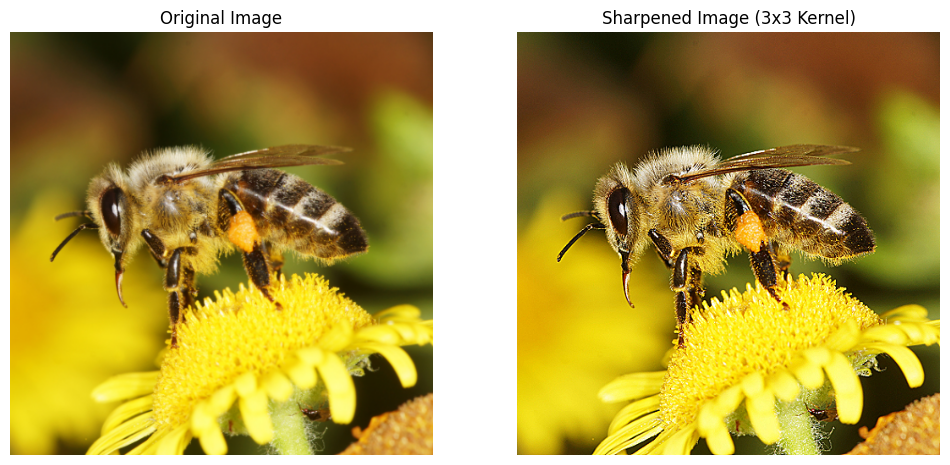

In [7]:
# Load the image
image = cv.imread("images/native-bee.png")

# Define the sharpening kernel for 3x3
sharpening_kernel_3x3 = np.array([
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]
])

# Apply the kernel using filter2D
sharpened_image_3x3 = cv.filter2D(image, -1, sharpening_kernel_3x3)

# Save the result
cv.imwrite('sharpened_image_3x3.png', sharpened_image_3x3)

# Convert images from BGR to RGB for display with Matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
sharpened_image_3x3_rgb = cv2.cvtColor(sharpened_image_3x3, cv2.COLOR_BGR2RGB)

# Display images using Matplotlib
plt.figure(figsize=(12, 6))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')

# Sharpened image
plt.subplot(1, 2, 2)
plt.imshow(sharpened_image_3x3_rgb)
plt.title('Sharpened Image (3x3 Kernel)')
plt.axis('off')

plt.show()

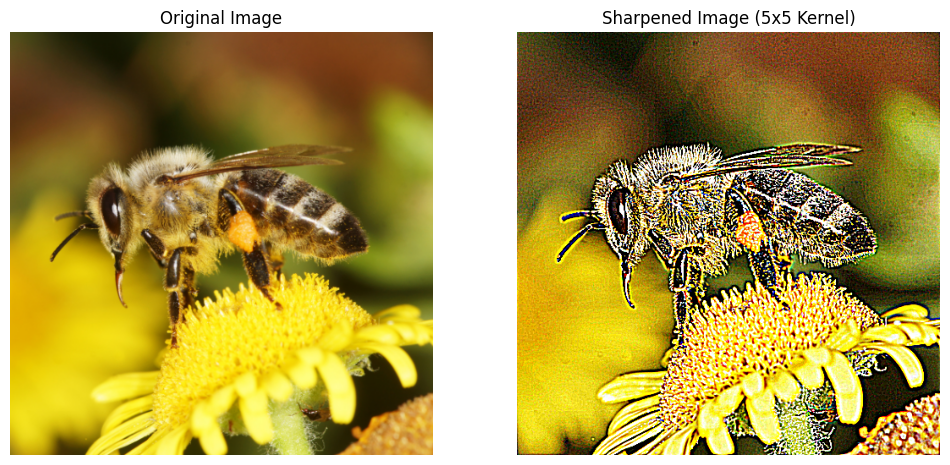

In [11]:
# Load the image
image = cv.imread("images/native-bee.png")

# Define the sharpening kernel for 3x3
sharpening_kernel_5x5 = np.array([
    [-1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1],
    [-1, -1, 25, -1, -1],
    [-1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1]
])


# Apply the kernel using filter2D
sharpened_image_5x5 = cv.filter2D(image, -1, sharpening_kernel_5x5)

# Save the result
cv.imwrite('sharpened_image_5.5.png', sharpened_image_5x5)

# Convert images from BGR to RGB for display with Matplotlib
image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)
sharpened_image_5x5_rgb = cv.cvtColor(sharpened_image_5x5, cv.COLOR_BGR2RGB)

# Display images using Matplotlib
plt.figure(figsize=(12, 6))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')

# Sharpened image
plt.subplot(1, 2, 2)
plt.imshow(sharpened_image_5x5_rgb)
plt.title('Sharpened Image (5x5 Kernel)')
plt.axis('off')

plt.show()

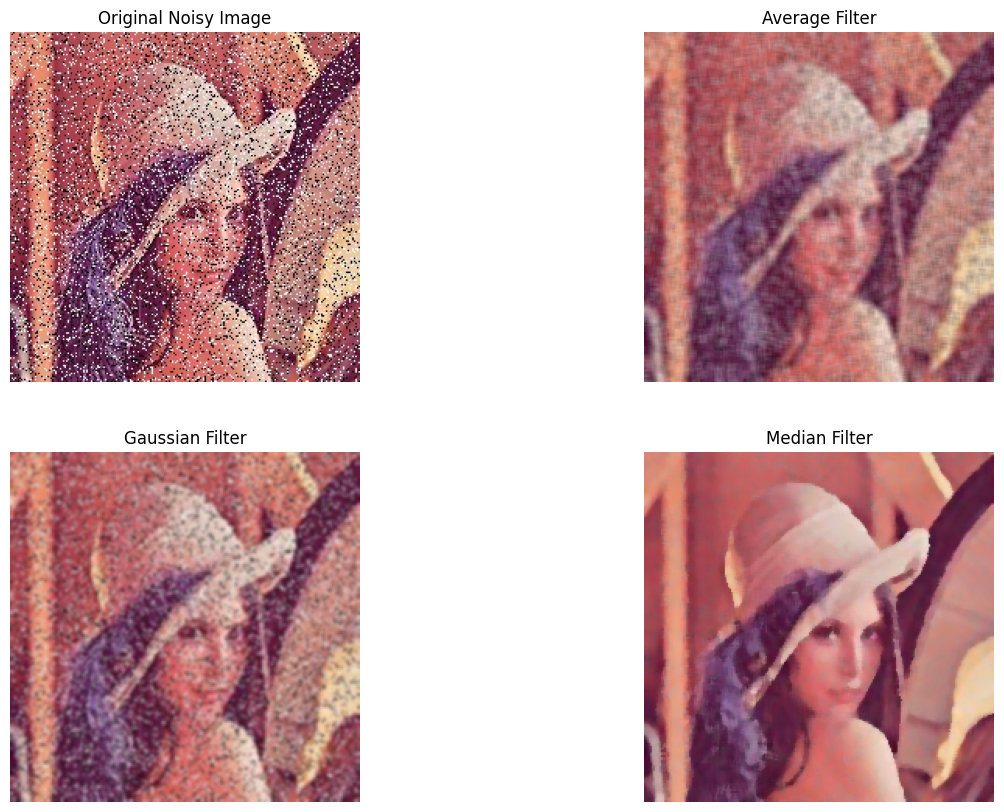

In [40]:
# Load the noisy image
image = cv.imread("images/noise_lena.jpg", cv.IMREAD_COLOR)

# Check if the image was loaded successfully
if image is None:
    raise FileNotFoundError("Image not found or path is incorrect.")

# Apply Average Filter
average_filter_size = 5
average_filtered = cv.blur(image, (average_filter_size, average_filter_size))

# Apply Gaussian Filter
gaussian_filter_size = 5
gaussian_filtered = cv.GaussianBlur(image, (gaussian_filter_size, gaussian_filter_size), 0)

# Apply Median Filter
median_filter_size = 5
median_filtered = cv.medianBlur(image, median_filter_size)

# Convert original and filtered images from BGR to RGB for displaying with matplotlib
image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)
average_filtered_rgb = cv.cvtColor(average_filtered, cv.COLOR_BGR2RGB)
gaussian_filtered_rgb = cv.cvtColor(gaussian_filtered, cv.COLOR_BGR2RGB)
median_filtered_rgb = cv.cvtColor(median_filtered, cv.COLOR_BGR2RGB)

# Display results using Matplotlib
plt.figure(figsize=(15, 10))

# Original noisy image
plt.subplot(2, 2, 1)
plt.imshow(image_rgb)
plt.title('Original Noisy Image')
plt.axis('off')

# Average Filtered image
plt.subplot(2, 2, 2)
plt.imshow(average_filtered_rgb)
plt.title('Average Filter')
plt.axis('off')

# Gaussian Filtered image
plt.subplot(2, 2, 3)
plt.imshow(gaussian_filtered_rgb)
plt.title('Gaussian Filter')
plt.axis('off')

# Median Filtered image
plt.subplot(2, 2, 4)
plt.imshow(median_filtered_rgb)
plt.title('Median Filter')
plt.axis('off')

plt.show()

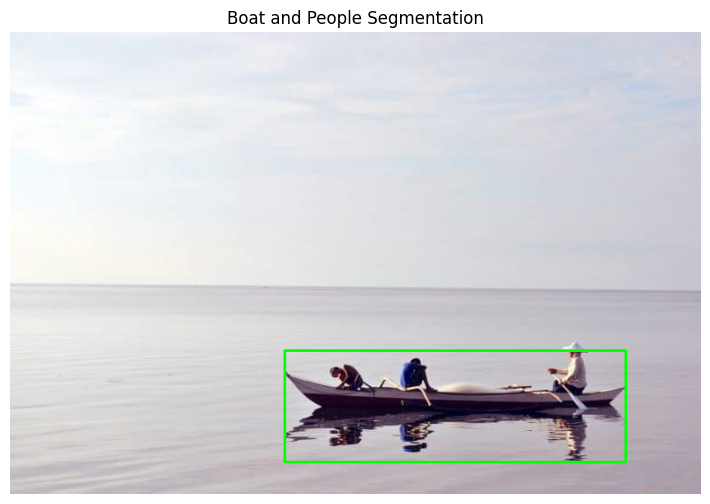

In [34]:
# Load the image with grey
gray_image = cv.imread('images/boat.jpg',0)

# Apply Otsu's thresholding
_, thresh_image = cv.threshold(gray_image, 0, 255, cv.THRESH_BINARY_INV | cv.THRESH_OTSU)
# Find contours
contours, _ = cv.findContours(thresh_image, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

# Find the largest contour (likely to be the boat and people)
largest_contour = max(contours, key=cv.contourArea)

# Get bounding box coordinates for the largest contour
x, y, w, h = cv.boundingRect(largest_contour)
color_image = cv.imread('images/boat.jpg')
image_rgb = cv.cvtColor(color_image, cv.COLOR_BGR2RGB)
# Draw the bounding box on the original image
cv.rectangle(image_rgb, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Display the result using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(image_rgb)
plt.axis('off')  # Hide the axis
plt.title('Boat and People Segmentation')
plt.show()